In [18]:
import pandas as pd   #Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
#Load the dataset
dataset_path = "train.csv"
data = pd.read_csv(dataset_path)

In [20]:
# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., fill with mean or median)
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

# Select relevant features (e.g., square footage, bedrooms, bathrooms, etc.)
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Target variable
target = data['SalePrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) #Split the data into training and testing sets

In [22]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2810942965.2180653


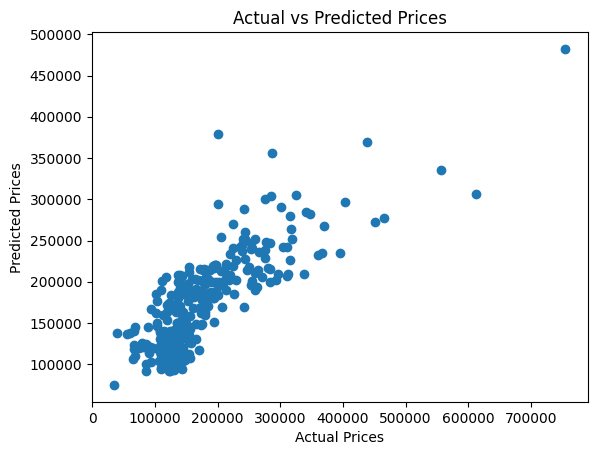

In [24]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


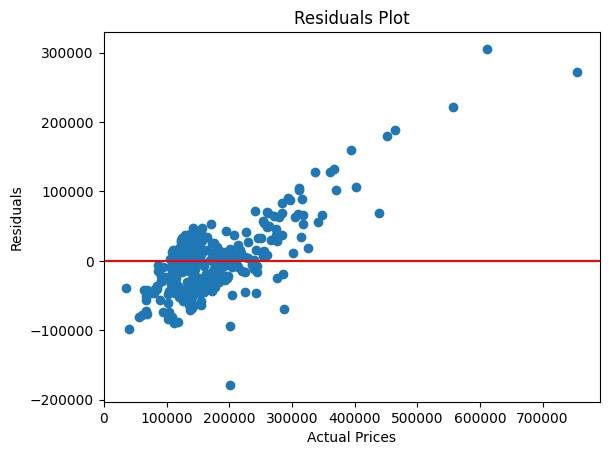

In [25]:
# Calculate residuals
residuals = y_test - predictions

# Create a residuals plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle="-")
plt.title("Residuals Plot")
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()


In [26]:
# Load the test data
test_data = pd.read_csv('test.csv')

In [27]:
# Select features for prediction
new_data = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Handle missing values (if any)
new_data = new_data.dropna(axis=1)

# Make predictions on the test set
predicted_prices = model.predict(new_data)

# Display the predicted prices
print("Predicted Prices for Test Data:")
print(predicted_prices)

Predicted Prices for Test Data:
[121423.03098489 143380.87062201 204748.66887361 ... 101383.28325958
 102247.2261882  242491.45083504]


In [28]:
# Example new data
new_data = [[1000, 2, 2, 1]]  # Replace this with new input features

# Predict the price for new data
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 167462.89957706246


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
